### This is to study the min-sum approximation in channel decoding
\begin{equation}
2\tanh^{-1}{\lbrack\prod_{v'\in M(c)\backslash v}\tanh{(\frac{u^t_{v'\rightarrow c} }{2})}\rbrack}
\approx
\min_{v'\in M(c)\backslash v}|u^t_{v'\rightarrow c}|\prod_{v'\in M(c)\backslash v}\text{sign}{(u^t_{v'\rightarrow c} )}.
\end{equation}

In [1]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def minsum(x):
    return np.min(np.abs(x)) * np.prod(np.sign(x))

In [3]:
def itanh_prodtanh(x):
    return 2 * np.arctanh(np.prod(np.tanh(x/2)))

In [4]:
np.random.seed(2020)

In [5]:
for n in range(1, 10):
    x = np.random.random(n) * 2 - 1  # fall into range [-1,1]
    res1 = minsum(x)
    res2 = itanh_prodtanh(x)
    
    #print("prod(tanh(x/2))", np.prod(np.tanh(x/2)))
    
    if n == 2:
        A, B = x
        offset = np.log( (1+np.exp(-np.abs(A+B))) / (1+np.exp(-np.abs(A-B))) )
        print(n, "minsum={:.4f}, target={:.4f}, offset={:.4f}, minsum+offset={:.4f}".format(
            res1, res2, offset, res1+offset))
    else:
        print(n, "minsum={:.4f}, target={:.4f}".format(
            res1, res2))

1 minsum=0.9726, target=0.9726
2 minsum=0.0195, target=0.0070, offset=-0.0125, minsum+offset=0.0070
3 minsum=-0.3262, target=-0.0200
4 minsum=-0.3134, target=-0.0078
5 minsum=-0.2887, target=-0.0009
6 minsum=-0.1229, target=-0.0002
7 minsum=-0.0067, target=-0.0000
8 minsum=-0.0479, target=-0.0000
9 minsum=-0.1153, target=-0.0000


In [6]:
def mean_err(f, info, Ns, repeated=3000, scaled_norm=1):
    """
    Measure the mean approximation error.
    
    Args:
        f: approximation function takes given vector and returns output value
        info: the print message to include
        Ns: a list of input vector dimension
        repeated: number of simulation times
        scaled_norm: the sampling range [-1,1] * scaled_norm
    
    Returns:
        A dictionary containing the mean error, Ns, mean target values and approx values
    """
    
    output = {'mean_err':[], '|target|':[], 'f(x)':[], 'Ns': Ns}
    for n in Ns:
        err = 0
        target = 0
        fx = 0
        for _ in range(repeated):
            x = np.random.random(n) * 2 - 1  # fall into range [-1,1]
            x = x * scaled_norm
            res1 = f(x)
            res2 = itanh_prodtanh(x)
            err += np.abs(res1 - res2)
            target += np.abs(res2)
            fx += np.abs(res1)
        mean_err = err / repeated
        target = target / repeated
        fx = fx / repeated
        print("{}, n={}, mean err={:.5f}, |target|={:.5f}, f(x)={:.5f}".format( 
              info, n, mean_err, target, fx))
        
        output['mean_err'].append(mean_err)
        output['|target|'].append(target)
        output['f(x)'].append(fx)
    return output

In [7]:
ms = mean_err(minsum, "minsum", range(1,10)) #10000 samples from [-1,1]

minsum, n=1, mean err=0.00000, |target|=0.50908, f(x)=0.50908
minsum, n=2, mean err=0.21595, |target|=0.11429, f(x)=0.33024
minsum, n=3, mean err=0.22411, |target|=0.02765, f(x)=0.25176
minsum, n=4, mean err=0.19310, |target|=0.00671, f(x)=0.19981
minsum, n=5, mean err=0.17197, |target|=0.00171, f(x)=0.17369
minsum, n=6, mean err=0.14154, |target|=0.00039, f(x)=0.14193
minsum, n=7, mean err=0.12546, |target|=0.00009, f(x)=0.12554
minsum, n=8, mean err=0.11124, |target|=0.00002, f(x)=0.11127
minsum, n=9, mean err=0.09765, |target|=0.00001, f(x)=0.09765


### This is to study the offset minsum approximation
\begin{equation}
2\tanh^{-1}{\lbrack\prod_{v'\in M(c)\backslash v}\tanh{(\frac{u^t_{v'\rightarrow c} }{2})}\rbrack}
\approx
\max(\min_{v'\in M(c)\backslash v}|u^t_{v'\rightarrow c}|-\beta, 0)
\prod_{v'\in M(c)\backslash v}\text{sign}{(u^t_{v'\rightarrow c} )}
\end{equation}

In [8]:
def offsetminsum(x, offset):
    return max(0, np.min(np.abs(x)) - offset) * np.prod(np.sign(x))

In [9]:
oms = {}
os = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for offset in os:
    f = partial(offsetminsum, offset=offset)
    oms[offset] = mean_err(f, "offsetminsum={:.2f}".format(offset), range(1,10), scaled_norm=1)

offsetminsum=0.00, n=1, mean err=0.00000, |target|=0.50083, f(x)=0.50083
offsetminsum=0.00, n=2, mean err=0.21821, |target|=0.11712, f(x)=0.33533
offsetminsum=0.00, n=3, mean err=0.22166, |target|=0.02725, f(x)=0.24891
offsetminsum=0.00, n=4, mean err=0.19592, |target|=0.00679, f(x)=0.20271
offsetminsum=0.00, n=5, mean err=0.16406, |target|=0.00156, f(x)=0.16562
offsetminsum=0.00, n=6, mean err=0.14421, |target|=0.00039, f(x)=0.14459
offsetminsum=0.00, n=7, mean err=0.12434, |target|=0.00009, f(x)=0.12443
offsetminsum=0.00, n=8, mean err=0.11017, |target|=0.00002, f(x)=0.11019
offsetminsum=0.00, n=9, mean err=0.10020, |target|=0.00001, f(x)=0.10021
offsetminsum=0.10, n=1, mean err=0.09504, |target|=0.50190, f(x)=0.40687
offsetminsum=0.10, n=2, mean err=0.13275, |target|=0.11320, f(x)=0.23926
offsetminsum=0.10, n=3, mean err=0.13354, |target|=0.02665, f(x)=0.15835
offsetminsum=0.10, n=4, mean err=0.11136, |target|=0.00671, f(x)=0.11750
offsetminsum=0.10, n=5, mean err=0.08787, |target|=

In [10]:
def plotcurve(res, os, y='mean_err', title='10000 samples from [-1,1]'):
    fig, ax = plt.subplots()
    for o in os:
        ax.plot(res[o]['Ns'], res[o][y], label="{:.2f}".format(o))
    ax.legend()
    ax.set_ylabel(y)
    ax.set_xlabel('N')
    ax.set_title(title)
    plt.show()

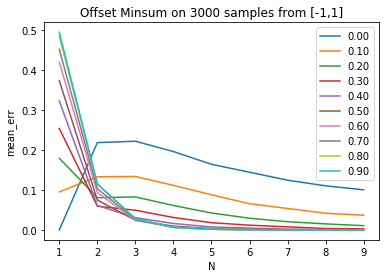

In [11]:
plotcurve(oms, os, title='Offset Minsum on 3000 samples from [-1,1]')

In [12]:
oms2 = {}
os = np.arange(0.12, 0.32, 0.02)
for offset in os:
    f = partial(offsetminsum, offset=offset)
    oms2[offset] = mean_err(f, "offsetminsum={:.2f}".format(offset), range(1,len(os)), scaled_norm=1)

offsetminsum=0.12, n=1, mean err=0.11220, |target|=0.49441, f(x)=0.38221
offsetminsum=0.12, n=2, mean err=0.12500, |target|=0.11830, f(x)=0.23335
offsetminsum=0.12, n=3, mean err=0.12434, |target|=0.02802, f(x)=0.14951
offsetminsum=0.12, n=4, mean err=0.10268, |target|=0.00683, f(x)=0.10872
offsetminsum=0.12, n=5, mean err=0.07728, |target|=0.00165, f(x)=0.07870
offsetminsum=0.12, n=6, mean err=0.05797, |target|=0.00038, f(x)=0.05829
offsetminsum=0.12, n=7, mean err=0.04317, |target|=0.00009, f(x)=0.04324
offsetminsum=0.12, n=8, mean err=0.03483, |target|=0.00002, f(x)=0.03485
offsetminsum=0.12, n=9, mean err=0.02915, |target|=0.00001, f(x)=0.02915
offsetminsum=0.14, n=1, mean err=0.13007, |target|=0.49555, f(x)=0.36548
offsetminsum=0.14, n=2, mean err=0.11625, |target|=0.12053, f(x)=0.22357
offsetminsum=0.14, n=3, mean err=0.11035, |target|=0.02748, f(x)=0.13396
offsetminsum=0.14, n=4, mean err=0.09061, |target|=0.00677, f(x)=0.09629
offsetminsum=0.14, n=5, mean err=0.06740, |target|=

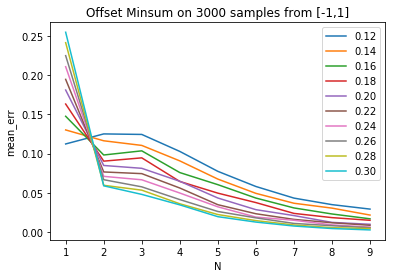

In [13]:
plotcurve(oms2, os, title='Offset Minsum on 3000 samples from [-1,1]')

### This is to study the scaled minsum approximation
\begin{equation}
2\tanh^{-1}{\lbrack\prod_{v'\in M(c)\backslash v}\tanh{(\frac{u^t_{v'\rightarrow c} }{2})}\rbrack}
\approx
w\times 
\min_{v'\in M(c)\backslash v}|u^t_{v'\rightarrow c}|\prod_{v'\in M(c)\backslash v}\text{sign}{(u^t_{v'\rightarrow c} )}
\end{equation}

In [14]:
def scaledminsum(x, coef):
    return coef * np.min(np.abs(x)) * np.prod(np.sign(x))

In [15]:
sms = {}
ss = np.arange(0, 1, 0.1)
for coef in ss:
    f = partial(scaledminsum, coef=coef)
    sms[coef] = mean_err(f, "scaledminsum={:.2f}".format(coef), range(1,len(ss)))

scaledminsum=0.00, n=1, mean err=0.50617, |target|=0.50617, f(x)=0.00000
scaledminsum=0.00, n=2, mean err=0.11756, |target|=0.11756, f(x)=0.00000
scaledminsum=0.00, n=3, mean err=0.02757, |target|=0.02757, f(x)=0.00000
scaledminsum=0.00, n=4, mean err=0.00646, |target|=0.00646, f(x)=0.00000
scaledminsum=0.00, n=5, mean err=0.00161, |target|=0.00161, f(x)=0.00000
scaledminsum=0.00, n=6, mean err=0.00039, |target|=0.00039, f(x)=0.00000
scaledminsum=0.00, n=7, mean err=0.00009, |target|=0.00009, f(x)=0.00000
scaledminsum=0.00, n=8, mean err=0.00002, |target|=0.00002, f(x)=0.00000
scaledminsum=0.00, n=9, mean err=0.00001, |target|=0.00001, f(x)=0.00000
scaledminsum=0.10, n=1, mean err=0.44458, |target|=0.49398, f(x)=0.04940
scaledminsum=0.10, n=2, mean err=0.08487, |target|=0.11850, f(x)=0.03375
scaledminsum=0.10, n=3, mean err=0.01007, |target|=0.02784, f(x)=0.02507
scaledminsum=0.10, n=4, mean err=0.01344, |target|=0.00694, f(x)=0.02038
scaledminsum=0.10, n=5, mean err=0.01519, |target|=

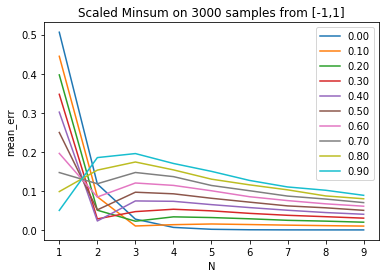

In [16]:
plotcurve(sms, ss, title='Scaled Minsum on 3000 samples from [-1,1]')

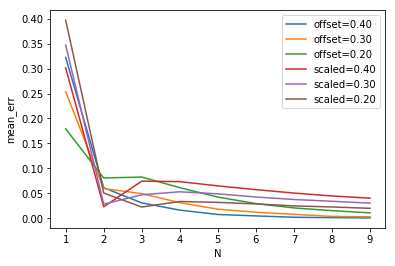

In [17]:
fig, ax = plt.subplots()

ax.plot(oms[0.4]['Ns'], oms[0.4]['mean_err'], label="offset={:.2f}".format(0.4))
ax.plot(oms[0.3]['Ns'], oms[0.3]['mean_err'], label="offset={:.2f}".format(0.3))
ax.plot(oms[0.2]['Ns'], oms[0.2]['mean_err'], label="offset={:.2f}".format(0.2))

ax.plot(sms[0.4]['Ns'], sms[0.4]['mean_err'], label="scaled={:.2f}".format(0.4))
ax.plot(sms[ss[3]]['Ns'], sms[ss[3]]['mean_err'], label="scaled={:.2f}".format(ss[3]))
ax.plot(sms[0.2]['Ns'], sms[0.2]['mean_err'], label="scaled={:.2f}".format(0.2))

ax.legend()
ax.set_ylabel('mean_err')
ax.set_xlabel('N')
plt.show()